In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import dates as mdates
import datetime as dt
import matplotlib

In [102]:
# Auto-limit settings
matplotlib.rcParams['axes.autolimit_mode'] = 'round_numbers'
matplotlib.rcParams['axes.xmargin'] = 0
matplotlib.rcParams['axes.ymargin'] = 0

In [103]:
# Import Raw Data
f = 'Tulsa Raw Data.xlsx'
df = pd.read_excel(f, index_col=0)
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136157 entries, 2017-01-01 00:00:00 to 2007-12-31 23:00:00
Data columns (total 1 columns):
Flow    136157 non-null float64
dtypes: float64(1)
memory usage: 2.1 MB


# Moving Averages and annual changes

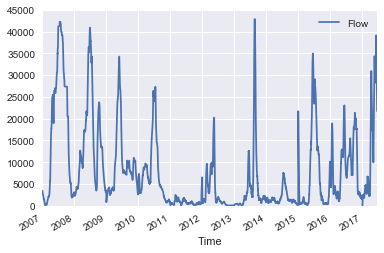

In [104]:
%matplotlib inline
ma = df.rolling(24*30, min_periods=30).mean()
ma.plot()

In [105]:
dfya = df.resample('A').mean()
dfya


,Flow
Time,
2007-12-31,11840.956006
2008-12-31,14862.921663
2009-12-31,9913.450578
2010-12-31,7868.369951
2011-12-31,1036.364786
2012-12-31,3851.986280
2013-12-31,5135.716263
2014-12-31,1712.689903
2015-12-31,7197.108119


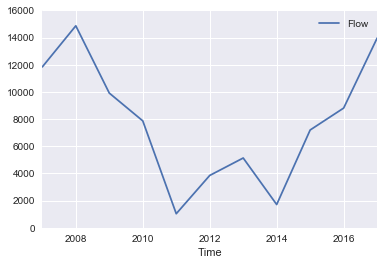

In [106]:
dfya.plot()

# Grouping by year, descriptive stats 

In [107]:
dfy = df.copy()
dfy['Year']=dfy.index.map(lambda x: x.year)
dfy_desc = dfy.groupby('Year').describe()
quantiles = np.arange(0.1, 1, 0.1)
dfy_quantile = dfy.groupby('Year').quantile(q = quantiles)
dfy_quantile = dfy_quantile.unstack() 
dfy_quantile

Flow                                                              \
        0.1     0.2     0.3     0.4      0.5      0.6      0.7      0.8   
Year                                                                      
2007   49.0   139.0   610.0  1910.0   4620.0   8840.0  15100.0  23100.0   
2008  785.5  2600.0  5440.0  8840.0  10900.0  12300.0  18900.0  26000.0   
2009  590.0  1760.0  3330.0  5520.0   7000.0  10500.0  11700.0  12300.0   
2010  131.0   437.0  1260.0  2600.0   5260.0   7800.0   9910.0  12200.0   
2011   86.1   105.0   115.0   126.0    137.0    155.0    546.0   1340.0   
2012   95.1   143.0   424.0   707.0   1050.0   1870.0   3750.0   6460.0   
2013   77.7   143.0   263.0   518.0    798.0   1370.0   3930.0   7510.0   
2014  106.0   135.0   184.0   250.0    415.0    871.0   1520.0   2620.0   
2015   88.5   122.0   206.0   371.0    856.0   2620.0   8640.0  14700.0   
2016  178.0   665.0  2050.0  5440.0   7540.0  10200.0  11800.0  12800.0   
2017  250.0   871.0  2050.0  4420.0   7110.0  12100.0  21800.0  30300.0   

               
          0.9  
Year           
2007  36700.0  
2008  37700.0  
2009  24960.0  
2010  13500.0  
2011   3350.0  
2012  10200.0  
2013  12200.0  
2014   5880.0  
2015  26200.0  
2016  22600.0  
2017  38700.0

In [108]:
# fig, ax = plt.subplots(figsize = (17,11))
# keys =[]
# for key in dfy_quantile:
#     keys.append(key)
# ax.plot(dfy_quantile.index, dfy_quantile[key[0]])


In [109]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136157 entries, 2017-01-01 00:00:00 to 2007-12-31 23:00:00
Data columns (total 2 columns):
Flow    136157 non-null float64
Year    136157 non-null int64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB


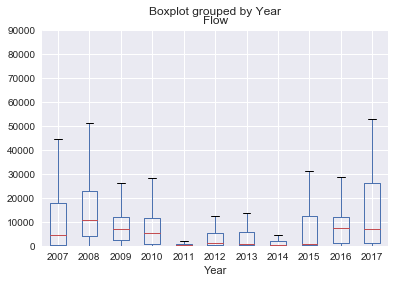

In [110]:
# dfy_boxplot = dfy.groupby('Year').boxplot(column='Flow',subplots=False, rot=90, figsize=(17,11))
dfy.boxplot(column='Flow', by='Year')

# Grouping by Month, descriptive stats

In [111]:
dfm = df.copy()
dfm['Month']=dfm.index.map(lambda x: x.month)
# dfm_boxplot = dfm.groupby('Month').boxplot(subplots=False, rot=90, figsize=(17,11))
dfm_quantile = dfm.groupby('Month').quantile(q = quantiles)
dfm_quantile = dfm.groupby('Month').quantile(q = quantiles)
dfm_quantile = dfm_quantile.unstack()
dfm_quantile

Flow                                                             \
         0.1    0.2     0.3     0.4      0.5      0.6      0.7      0.8   
Month                                                                     
1       67.1  105.0   139.0   273.0    558.0   1070.0   2050.0   4190.0   
2      103.0  158.0   322.0   743.0   1500.0   2810.0   4950.0   7540.0   
3      103.0  169.0   362.0   729.0   1310.0   2030.0   3650.0   5700.0   
4       95.1  131.0   284.0   959.0   3040.0   6180.0  10600.0  13740.0   
5      120.0  270.0   897.0  3280.0   8910.0  12300.0  18400.0  27100.0   
6      120.0  761.0  2557.0  6410.0  10500.0  12800.0  22100.0  30200.0   
7      131.0  640.0  1140.0  3640.0   6990.0   9888.0  11500.0  13400.0   
8      158.0  464.8   959.0  2280.0   5600.0   8410.0  11000.0  14700.0   
9       90.5  126.0   246.0   525.0   1210.0   3750.0   5970.0  10300.0   
10      73.8  106.0   143.0   224.0    437.0   1054.0   3280.0   8690.0   
11     103.0  126.0   143.0   189.0    362.0    876.0   1950.0   4370.0   
12      90.5  126.0   178.0   322.0    628.0   1130.0   2130.0   4080.0   

                
           0.9  
Month           
1       8110.0  
2      11400.0  
3      10700.0  
4      26900.0  
5      37630.0  
6      39100.0  
7      22620.0  
8      21800.0  
9      16060.0  
10     13500.0  
11      8675.0  
12      7860.0

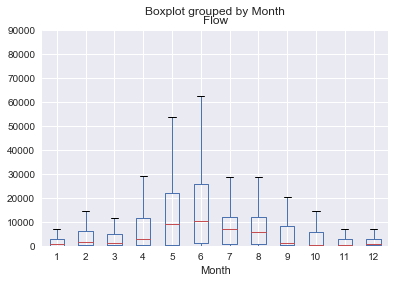

In [112]:
dfm.boxplot(column='Flow', by='Month')

In [113]:
# fig3, ax3 = plt.subplots(figsize = (17,11))
# ax3.plot(dfm_quantile.index, dfm_quantile['Flow'][0.1], 'r--')
# ax3.plot(dfm_quantile.index, dfm_quantile['Flow'][0.5], 'r', linewidth=3)
# ax3.plot(dfm_quantile.index, dfm_quantile['Flow'][0.9], 'r--')
# ax3.fill_between(dfm_quantile.index, dfm_quantile['Flow'][0.5], dfm_quantile['Flow'][0.9], alpha=0.25, facecolor='r')
# ax3.fill_between(dfm_quantile.index, dfm_quantile['Flow'][0.1], dfm_quantile['Flow'][0.5], alpha=0.25, facecolor='r')
# ax3.set_xlim([1,12])

# Grouping by Hour, descriptive stats

In [114]:
dfd = df.copy()
dfd['Time']=dfd.index.map(lambda x: x.strftime('%H:%M'))
dfd = dfd.groupby('Time').quantile(q = quantiles).unstack()
# dfd.index = pd.to_datetime(dfd.index.astype(str))
drop_cols = np.arange(1,49,2)
print(drop_cols)
dfd = dfd.drop(dfd.index[15])
dfd = dfd.drop(dfd.index[drop_cols])
dfd

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47]


C:\Users\swalton\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'Time' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


Flow                                                                  
         0.1    0.2     0.3     0.4     0.5     0.6      0.7      0.8      0.9
Time                                                                          
00:00  110.0  189.0   666.6  2320.0  5480.0  8230.0  10600.0  12200.0  22960.0
01:00  110.0  205.6   854.1  3350.0  5650.0  8010.0  10400.0  12100.0  22970.0
02:00  110.0  213.0   979.0  3420.0  5440.0  7610.0   9738.0  12000.0  23000.0
03:00  110.0  224.0  1036.0  3030.0  4750.0  6626.0   8737.0  11900.0  22890.0
04:00  110.0  218.4  1006.0  2460.0  3920.0  5736.0   7467.0  11900.0  23000.0
05:00  110.0  206.0   904.6  2000.0  3070.0  4718.0   6352.0  11900.0  23120.0
06:00  110.0  190.6   728.7  1550.0  2415.0  3718.0   5650.0  12000.0  22970.0
07:00  106.0  184.0   616.7  1260.0  1910.0  2870.0   5212.0  11900.0  22800.0
08:00  106.0  173.0   525.0  1000.0  1510.0  2228.0   4750.0  11920.0  23100.0
09:00  105.0  162.0   450.9   820.0  1240.0  1760.0   4750.0  11900.0  22900.0
10:00  105.0  153.0   376.0   707.0  1040.0  1480.0   4980.0  12000.0  23000.0
11:00  105.0  148.0   330.0   623.0   914.0  1390.0   5440.0  11900.0  23000.0
12:00  105.0  143.0   306.0   592.0   897.0  2000.0   5920.0  11900.0  23020.0
13:00  105.0  144.0   316.0   607.0  1070.0  4130.0   7934.0  11900.0  23100.0
14:00  105.1  153.0   340.9   688.0  2100.0  5762.0   9170.0  12100.0  23100.0
15:00  109.0  155.0   340.0   690.0  3000.0  6090.0   9470.0  12000.0  23000.0
16:00  110.0  155.0   332.8   761.0  3460.0  6134.0   9416.0  12100.0  23100.0
17:00  110.0  158.0   335.2   781.0  3690.0  5848.0   9622.0  12100.0  22900.0
18:00  110.0  155.0   340.0   911.4  3180.0  5732.0   9908.0  12200.0  22880.0
19:00  108.1  158.0   353.0  1108.0  2970.0  5740.0  10200.0  12100.0  22790.0
20:00  110.0  158.0   378.1  1260.0  2670.0  6050.0  10600.0  12120.0  23000.0
21:00  110.0  158.0   450.0  1320.0  2850.0  6810.0  10800.0  12200.0  22920.0
22:00  110.0  163.0   524.0  1340.0  3690.0  7880.0  11000.0  12200.0  22900.0
23:00  110.0  173.0   576.0  1500.0  4960.0  8386.0  10900.0  12200.0  23000.0

In [115]:
# fig2, ax2 = plt.subplots(figsize = (17,11))


# #Plot 
# ax2.plot(dfd.index, dfd['Flow']['75%'], 'r--')
# ax2.plot(dfd.index, dfd['Flow']['25%'], 'r--')
# ax2.fill_between(dfd.index, dfd['Flow']['mean'], dfd['Flow']['75%'], alpha=0.25, facecolor='r')
# ax2.fill_between(dfd.index, dfd['Flow']['mean'], dfd['Flow']['25%'], alpha=0.25, facecolor='r')
# ax2.plot(dfd.index, dfd['Flow']['mean'], 'r', linewidth=3)

# # Corrected Ticks
# ticks = ax2.get_xticks()
# ax2.set_xticks(np.linspace(ticks[0], mdates.date2num(mdates.num2date(ticks[-1]) + dt.timedelta(hours=1)), 12))
# ax2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
# ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%I:%M %p'))
